<a href="https://colab.research.google.com/github/Datag4rcia/AAPL/blob/main/trabalhomachinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predição de câncer de pulmão
O presente estudo de caso propõe-se a desenvolver e aplicar modelos supervisionados de aprendizado de máquina (Machine Learning) com o intuito de prever a ocorrência de câncer de pulmão. Este objetivo visa aprimorar a detecção precoce e auxiliar no diagnóstico, utilizando as capacidades preditivas das ferramentas de Machine Learning.

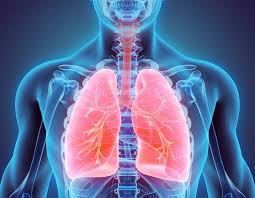

O Aprendizado Supervisionado constitui um dos principais paradigmas do aprendizado de máquina, caracterizado pela utilização de um conjunto de dados de treinamento que já contém os rótulos corretos para cada exemplo de entrada. Para cada amostra de dados x, existe uma saída correspondente y conhecido. O objetivo principal de um algoritmo de aprendizado supervisionado é, portanto, aprender uma função de mapeamento f que associe as variáveis de entrada X às variáveis de saída Y, ou seja, Y=f(X).

### Carregamento das bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

### Carregamento do dataset

In [3]:
df = pd.read_csv("dataset_med.csv")
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


### Análise Exploratória
A compreensão aprofundada da estrutura física dos dados e a análise das estatísticas descritivas básicas representam uma etapa fundamental no processo de desenvolvimento de modelos de aprendizado de máquina. Tal fase é crucial não apenas para a validação da qualidade e integridade do conjunto de dados, mas também para a identificação de padrões subjacentes, anomalias e relações entre as variáveis. Este conhecimento preliminar é indispensável para a seleção e o ajuste adequados dos algoritmos de aprendizado, bem como para a interpretação fidedigna dos resultados obtidos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [5]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['country'].value_counts()

,count
country,
Malta,33367
Ireland,33243
Portugal,33208
France,33199
Sweden,33161
Croatia,33138
Greece,33052
Spain,33042
Netherlands,33040


In [7]:
df.isnull().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0


### Limpeza dos dados
Nesta etapa do estudo, procedeu-se à filtragem e remoção criteriosa dos dados que não apresentavam relevância direta para os objetivos da pesquisa ou que poderiam introduzir ruído e vieses indesejáveis na modelagem preditiva.

In [8]:
df = df.drop(['diagnosis_date', 'end_treatment_date','id'], axis=1)

### Visualização de dados
Com o intuito de aprimorar a compreensão sobre a estrutura e as características do conjunto de dados, bem como para facilitar a identificação de padrões, tendências e anomalias que não seriam evidentes em formatos tabulares, optou-se pela visualização dinâmica dos dados. Esta abordagem permite uma exploração interativa, proporcionando insights mais profundos e uma análise mais intuitiva das relações entre as variáveis.

📊 **Gráficos de barras**

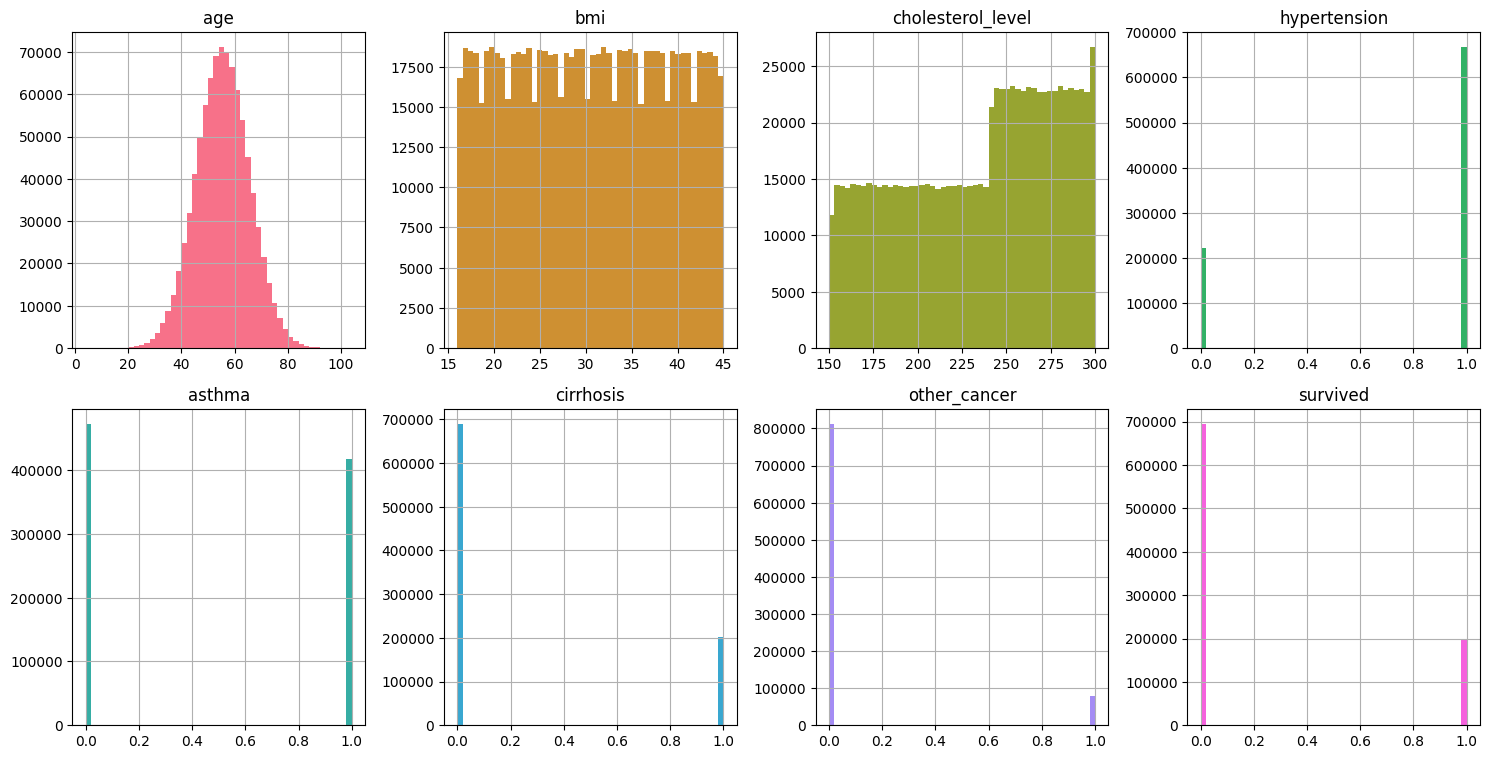

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Pegando apenas colunas numéricas
cols = df.select_dtypes(include='number').columns

# Gerar cores distintas (uma para cada coluna)
cores = sns.color_palette("husl", len(cols))

# Criar histogramas com cores diferentes manualmente
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))  # ajuste nrows/ncols conforme o número de colunas
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].dropna().hist(
        bins=50,
        ax=axes[i],
        color=cores[i]
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se houver mais subplots do que colunas, desativa os extras
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()



📊 **Gráficos de barras com comparação entre as variáveis**


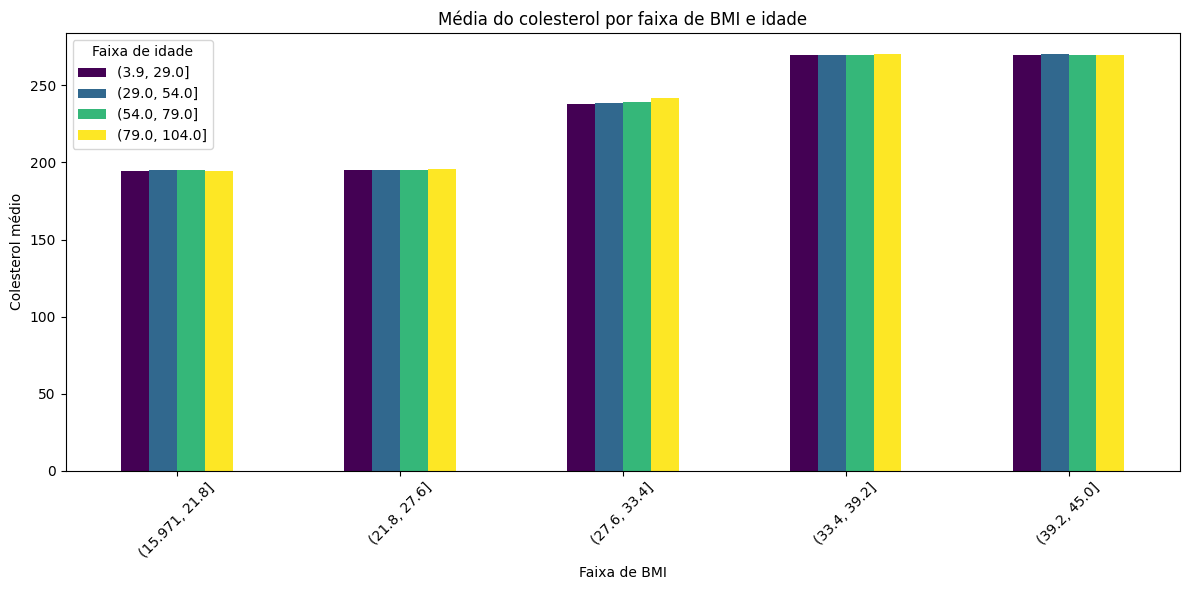

In [10]:
df['bmi_group'] = pd.cut(df['bmi'], bins=5)
df['age_group'] = pd.cut(df['age'], bins=4)

mean_cholesterol = df.groupby(['bmi_group', 'age_group'])['cholesterol_level'].mean().unstack()


mean_cholesterol.plot(kind='bar', figsize=(12,6), colormap='viridis')

plt.title('Média do colesterol por faixa de BMI e idade')
plt.xlabel('Faixa de BMI')
plt.ylabel('Colesterol médio')
plt.legend(title='Faixa de idade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🌍 **Gráfico geográfico**

In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Coordenadas médias por país
country_coords = {
    "Malta": (35.9375, 14.3754),
    "Ireland": (53.4129, -8.2439),
    "Portugal": (39.3999, -8.2245),
    "France": (46.6034, 1.8883),
    "Sweden": (60.1282, 18.6435),
    "Croatia": (45.1, 15.2),
    "Greece": (39.0742, 21.8243),
    "Spain": (40.4637, -3.7492),
    "Netherlands": (52.1326, 5.2913),
    "Denmark": (56.2639, 9.5018),
    "Slovenia": (46.1512, 14.9955),
    "Belgium": (50.5039, 4.4699),
    "Hungary": (47.1625, 19.5033),
    "Romania": (45.9432, 24.9668),
    "Poland": (51.9194, 19.1451),
    "Italy": (41.8719, 12.5674),
    "Germany": (51.1657, 10.4515),
    "Estonia": (58.5953, 25.0136),
    "Czech Republic": (49.8175, 15.4730),
    "Lithuania": (55.1694, 23.8813),
    "Slovakia": (48.6690, 19.6990),
    "Austria": (47.5162, 14.5501),
    "Finland": (61.9241, 25.7482),
    "Luxembourg": (49.8153, 6.1296),
    "Cyprus": (35.1264, 33.4299),
    "Latvia": (56.8796, 24.6032),
    "Bulgaria": (42.7339, 25.4858)
}

# Inserir lat/lon
df['latitude'] = df['country'].map(lambda x: country_coords[x][0])
df['longitude'] = df['country'].map(lambda x: country_coords[x][1])

# Criar um DataFrame agregado por país
df_country = df.groupby('country').agg({
    'survived': 'sum',  # Total de sobreviventes
    'latitude': 'first',
    'longitude': 'first'
}).reset_index()

df_country['total'] = df.groupby('country').size().values
df_country['survival_rate'] = df_country['survived'] / df_country['total']

# Criar categorias baseadas na taxa de sobrevivência
def categorizar_sobrevivencia(rate):
    if rate >= 0.22:
        return 'Taxa Alta (22≥%)'
    elif rate >= 0.21:
        return 'Taxa Moderada (10-21%)'
    elif rate >= 0.:
        return 'Taxa Baixa (5-10%)'
    else:
        return 'Taxa Crítica (<10%)'

df_country['categoria'] = df_country['survival_rate'].apply(categorizar_sobrevivencia)

# Cores para cada categoria (inspirado no mapa de perseguição)
color_map = {
    'Taxa Crítica (<10%)': '#d73027',      # Vermelho escuro
    'Taxa Baixa (10-20%)': '#fc8d59',      # Laranja
    'Taxa Moderada (20-30%)': '#fee08b',   # Amarelo
    'Taxa Alta (≥40%)': '#74c476'          # Verde
}

# Criar mapa choropleth estilizado
fig = px.choropleth(
    df_country,
    locations='country',
    locationmode='country names',
    color='categoria',
    color_discrete_map=color_map,
    hover_name='country',
    hover_data={
        'survived': True,
        'total': True,
        'survival_rate': ':.1%',
        'categoria': False
    },
    scope='europe',
    title='MAPA DE SOBREVIVÊNCIA POR PAÍS - EUROPA<br><sub>Taxa de Sobrevivência por Região</sub>',
    labels={
        'categoria': 'Nível de Sobrevivência',
        'country': 'País',
        'survived': 'Sobreviventes',
        'total': 'Total de Casos',
        'survival_rate': 'Taxa (%)'
    }
)

# Estilizar o mapa no estilo do exemplo
fig.update_geos(
    resolution=50,
    showframe=False,
    showcoastlines=True,
    coastlinecolor="white",
    showland=True,
    landcolor='#2d3e50',  # Cinza escuro para países sem dados
    showocean=True,
    oceancolor='#34495e',  # Azul escuro para oceano
    projection_type='natural earth'
)

# Atualizar layout geral
fig.update_layout(
    title={
        'text': 'MAPA DE SOBREVIVÊNCIA POR PAÍS - EUROPA<br><sub>Taxa de Sobrevivência por Região</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'color': 'white', 'family': 'Arial Black'}
    },
    font=dict(color='white'),
    paper_bgcolor='#2c3e50',  # Fundo escuro
    plot_bgcolor='#2c3e50',
    height=600,
    width=1000,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5,
        bgcolor='rgba(0,0,0,0.5)',
        bordercolor='white',
        borderwidth=1,
        font=dict(color='white', size=12)
    )
)

# Adicionar texto explicativo
fig.add_annotation(
    text="A taxa de sobrevivência é determinada de<br>acordo com os dados disponíveis na pesquisa.",
    showarrow=False,
    x=0.02,
    y=0.02,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="white"),
    bgcolor="rgba(0,0,0,0.5)",
    bordercolor="white",
    borderwidth=1
)

fig.show()

# Mostrar estatísticas por categoria
print("\n" + "="*50)
print("ESTATÍSTICAS POR CATEGORIA")
print("="*50)

for categoria in df_country['categoria'].unique():
    paises = df_country[df_country['categoria'] == categoria]
    print(f"\n{categoria}:")
    for _, pais in paises.iterrows():
        print(f"  • {pais['country']}: {pais['survival_rate']:.1%} ({pais['survived']}/{pais['total']})")


ESTATÍSTICAS POR CATEGORIA

Taxa Moderada (10-21%):
  • Austria: 21.8% (7153/32832)
  • Belgium: 22.0% (7243/32986)
  • Croatia: 22.0% (7287/33138)
  • Denmark: 21.9% (7246/33024)
  • France: 21.6% (7163/33199)
  • Greece: 22.0% (7255/33052)
  • Hungary: 22.0% (7252/32981)
  • Ireland: 21.9% (7281/33243)
  • Italy: 21.6% (7133/32948)
  • Lithuania: 21.9% (7195/32856)
  • Slovakia: 21.7% (7141/32853)
  • Sweden: 21.6% (7165/33161)

Taxa Alta (22≥%):
  • Bulgaria: 22.0% (7175/32559)
  • Cyprus: 22.0% (7211/32719)
  • Czech Republic: 22.3% (7331/32885)
  • Estonia: 22.3% (7339/32893)
  • Finland: 22.2% (7296/32798)
  • Germany: 22.1% (7280/32940)
  • Latvia: 22.3% (7246/32565)
  • Luxembourg: 22.2% (7284/32794)
  • Malta: 22.3% (7426/33367)
  • Netherlands: 22.3% (7355/33040)
  • Poland: 22.1% (7283/32949)
  • Portugal: 22.2% (7372/33208)
  • Romania: 22.2% (7318/32963)
  • Slovenia: 22.0% (7275/33005)
  • Spain: 22.1% (7299/33042)


📈 **BoxPlot**

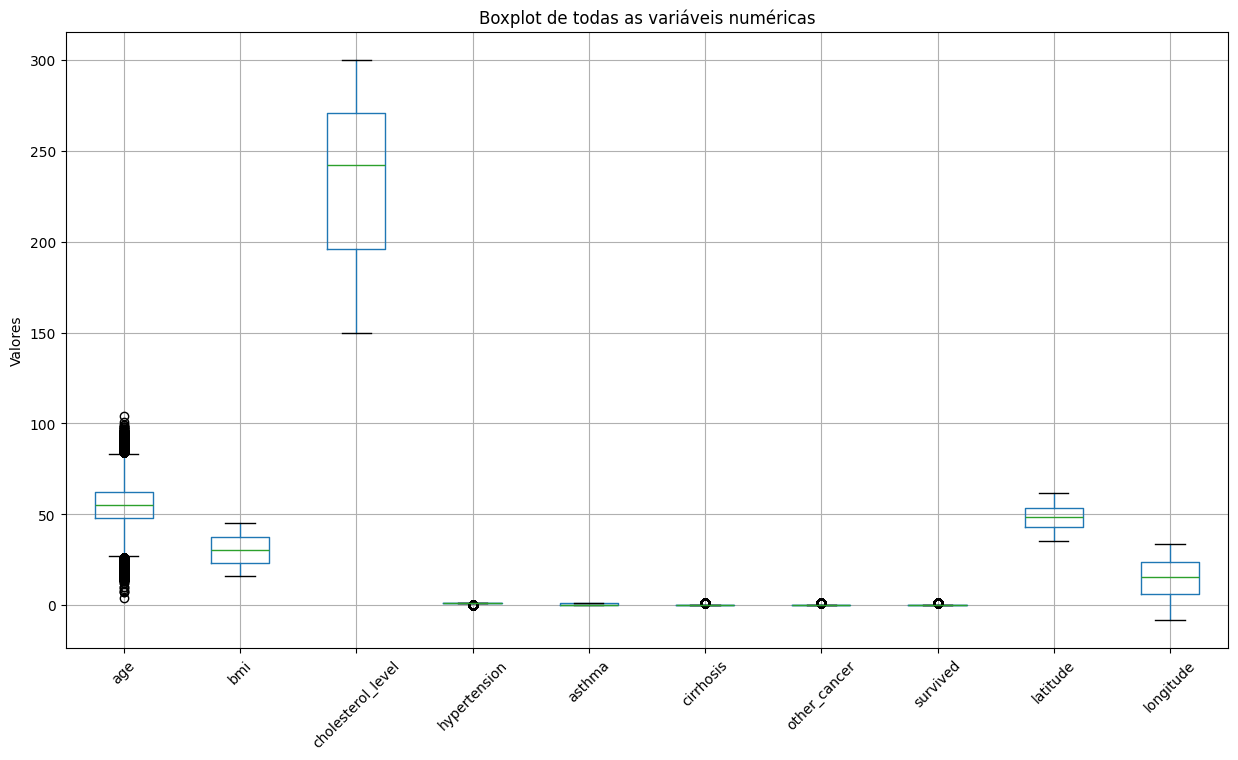

In [12]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 8))
df[num_cols].boxplot(rot=45)
plt.title('Boxplot de todas as variáveis numéricas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

### Pré processamento dos Dados
Com a fase de análise exploratória e compreensão dos dados concluída, o próximo estágio fundamental e de extrema importância consiste na preparação dos dados para a aplicação dos algoritmos de aprendizado de máquina. Esta etapa engloba uma série de processos que visam garantir que o conjunto de dados esteja em um formato adequado, limpo e otimizado para o treinamento eficaz dos modelos.

#### Codificação

In [13]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_country = LabelEncoder()
le_cancer_stage = LabelEncoder()
le_smoking_status = LabelEncoder()
le_family_history = LabelEncoder()
le_treatment_type= LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])
df['country'] = le_country.fit_transform(df['country'])
df['cancer_stage'] = le_cancer_stage.fit_transform(df['cancer_stage'])
df['smoking_status'] = le_smoking_status.fit_transform(df['smoking_status'])
df['family_history'] = le_family_history.fit_transform(df['family_history'])
df['treatment_type'] = le_treatment_type.fit_transform(df['treatment_type'])

#### Exclusão de variáveis inuteis

In [14]:
df = df.drop(['longitude', 'latitude','bmi_group','age_group',], axis=1)

In [15]:
df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64.0,1,26,0,1,3,29.4,199,0,0,1,0,0,0
1,50.0,0,19,2,1,3,41.2,280,1,1,0,0,3,1
2,65.0,0,12,2,1,1,44.0,268,1,1,0,0,1,0
3,51.0,0,1,0,0,3,43.0,241,1,1,0,0,0,0
4,37.0,1,17,0,0,3,19.7,178,0,0,0,0,1,0


#### Padronização das variáveis

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Suponha que sua coluna seja 'idade'
df['age'] = scaler.fit_transform(df[['age']])
df['bmi'] = scaler.fit_transform(df[['bmi']])
df['cholesterol_level'] = scaler.fit_transform(df[['cholesterol_level']])
df['cancer_stage'] = scaler.fit_transform(df[['cancer_stage']])
df['family_history'] = scaler.fit_transform(df[['family_history']])
df['smoking_status'] = scaler.fit_transform(df[['smoking_status']])
df['hypertension'] = scaler.fit_transform(df[['hypertension']])
df['asthma'] = scaler.fit_transform(df[['asthma']])
df['cirrhosis'] = scaler.fit_transform(df[['cirrhosis']])
df['other_cancer'] = scaler.fit_transform(df[['other_cancer']])
df['treatment_type'] = scaler.fit_transform(df[['treatment_type']])
df['treatment_type'] = scaler.fit_transform(df[['treatment_type']])
df['survived'] = scaler.fit_transform(df[['survived']])

#### Divisão em treinamento e teste

In [17]:
X = df.iloc[:, 1:13].values
y = df.iloc[:, 13].values

In [18]:
print(X.shape, y.shape)

(890000, 12) (890000,)


In [19]:
type(X)
type(y)

numpy.ndarray

### Avaliação dos modelos
Aplicação do algoritmo de aprendizado de máquina mais adequado para o problema em questão. Cada algoritmo disponível no vasto repertório do Machine Learning possui particularidades inerentes, que incluem diferentes pressupostos subjacentes, complexidades computacionais e sensibilidade a características específicas dos dados (e.g., linearidade, distribuição, presença de outliers).

A escolha do algoritmo ideal não é trivial e deve ser guiada por uma compreensão profunda tanto do problema a ser resolvido (neste caso, a previsão de câncer de pulmão) quanto das propriedades do conjunto de dados preparado. O objetivo primordial é identificar o algoritmo que melhor se alinha com as características dos dados e com os requisitos de desempenho do modelo, visando alcançar a melhor predição possível. Isso frequentemente envolve a experimentação com múltiplos algoritmos e a avaliação de sua performance por meio de métricas apropriadas para o tipo de problema (classificação ou regressão), a fim de determinar qual deles oferece a maior acurácia, robustez e capacidade de generalização para dados inéditos.
1. Regressão Linear (LR) - LinearRegression()

Conceito: A Regressão Linear é um dos algoritmos mais fundamentares e amplamente utilizados. Ela modela a relação entre uma variável dependente contínua e uma ou mais variáveis independentes (preditoras) através de uma equação linear. O objetivo é encontrar a linha (ou hiperplano, em múltiplas dimensões) que melhor se ajusta aos dados, minimizando a soma dos quadrados dos resíduos (diferença entre os valores observados e previstos).

2. LASSO (Least Absolute Shrinkage and Selection Operator) - Lasso()

Conceito: O LASSO é uma extensão da regressão linear que incorpora uma penalidade L1 (norma L1) à função de custo. Essa penalidade força os coeficientes de algumas variáveis a se tornarem exatamente zero, realizando assim a seleção de características (feature selection) e reduzindo a complexidade do modelo.

3. Elastic Net (EN) - ElasticNet()

Conceito: O Elastic Net combina as penalidades L1 (do LASSO) e L2 (da Regressão Ridge). Isso permite que ele se beneficie das propriedades de seleção de características do LASSO e da capacidade da Regressão Ridge de lidar com variáveis altamente correlacionadas.

3. K-Nearest Neighbors Regressor (KNN) - KNeighborsRegressor()

Conceito: O KNN é um algoritmo não-paramétrico baseado em instâncias. Para prever o valor de uma nova instância, ele identifica os 'K' vizinhos mais próximos no conjunto de treinamento (com base em uma métrica de distância, como a euclidiana) e calcula a média (ou mediana) dos valores de destino desses vizinhos.

4. Árvore de Regressão (CART - Classification and Regression Trees) - DecisionTreeRegressor()

Conceito: As Árvores de Decisão constroem um modelo na forma de uma estrutura de árvore, onde cada nó interno representa um teste em um atributo, cada ramo representa o resultado do teste e cada nó folha (terminal) contém o valor de previsão. Para regressão, o valor em um nó folha é a média dos valores da variável alvo das instâncias que caem naquele nó.

5. Support Vector Regressor (SVR) - SVR()

Conceito: O SVR é uma extensão das Máquinas de Vetores de Suporte (SVM) para problemas de regressão. Ao invés de minimizar o erro quadrático, o SVR busca encontrar uma função que desvie por no máximo ϵ (epsilon) dos valores reais para todas as amostras de treinamento, minimizando a complexidade do modelo (medida pela inclinação da função) ao mesmo tempo. Ele introduz um conceito de "margem de tolerância" para os erros.

. Métodos de Ensemble (Agrupamento) .
Os métodos de ensemble combinam as previsões de múltiplos modelos base (geralmente árvores de decisão) para melhorar a performance geral e a robustez.

1. Métodos de Boosting (Aumento)
Estes métodos constroem modelos sequencialmente, onde cada novo modelo tenta corrigir os erros dos modelos anteriores.

2. AdaBoost Regressor (ABR) - AdaBoostRegressor()

Conceito: O AdaBoost ("Adaptive Boosting") combina múltiplos "estimadores fracos" (geralmente árvores de decisão rasas) sequencialmente. Ele atribui pesos maiores às amostras que foram classificadas (ou previstas) incorretamente pelos modelos anteriores, focando o aprendizado nos exemplos mais difíceis.

3. Gradient Boosting Regressor (GBR) - GradientBoostingRegressor()

Conceito: O Gradient Boosting também constrói modelos sequencialmente, mas cada estimador subsequente é treinado para predizer os resíduos (erros) do modelo ensemble atual. Ele otimiza a função de perda usando um método de descida de gradiente.

4. Métodos de Bagging (Bootstrap Aggregating)
Estes métodos constroem vários modelos de forma independente e paralela, treinando cada um em uma subamostra diferente do conjunto de dados (com reposição). As previsões são então agregadas (média para regressão).

5. Random Forest Regressor (RFR) - RandomForestRegressor()

Conceito: O Random Forest constrói um grande número de árvores de decisão independentes. Cada árvore é treinada em uma amostra bootstrap dos dados e, em cada divisão de nó, um subconjunto aleatório de características é considerado. As previsões de todas as árvores são então combinadas (média) para obter a previsão final.

6. Extra Trees Regressor (ETR) - ExtraTreesRegressor()

Conceito: Similar ao Random Forest, mas com um nível adicional de aleatoriedade. Em vez de procurar o melhor limiar para dividir uma característica (como o Random Forest), o Extra Trees seleciona limiares de forma aleatória para cada característica candidata em cada nó. A melhor dessas divisões aleatórias é então escolhida.


#### Cross Validation e Aplicaão do treino

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
#Verificação do tamanho
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((178000, 12), (178000,))

In [32]:
num_folds = 3
seed = 5
scoring = 'neg_mean_squared_error'

#### Aplicação dos algoritmos

In [35]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Lista de modelos
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))


In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np


# Inicialização de resultados
kfold_results, train_results, test_results = [], [], []

for name, model in models:
    # Cross-validation com todos os núcleos
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    cv_errors = -cv_scores  # transforma em erro se o scoring for negativo (ex: neg_mean_squared_error)
    kfold_results.append(cv_errors)

    # Fit e avaliação
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_results.append(train_mse)
    test_results.append(test_mse)

    print(f"{name}: {cv_errors.mean():.4f} ({cv_errors.std():.4f}) Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")


LR: 1.0014 (0.0014) Train MSE: 1.0013, Test MSE: 0.9948
LASSO: 1.0013 (0.0014) Train MSE: 1.0013, Test MSE: 0.9948
EN: 1.0013 (0.0014) Train MSE: 1.0013, Test MSE: 0.9948
KNN: 1.2038 (0.0036) Train MSE: 0.8005, Test MSE: 1.1922
CART: 2.1010 (0.0036) Train MSE: 0.0004, Test MSE: 2.1031


#### Visualização e Interpretação dos resultados

DEBUGGING - Estrutura dos dados:
Type de kfold_results: <class 'list'>
Length de kfold_results: 5
Type de models: <class 'list'>
Length de models: 5
kfold_results[0]: type=<class 'numpy.ndarray'>, shape/len=(3,)
  Primeiros valores: [np.float64(0.9997853293329322), np.float64(1.0030904108185716), np.float64(1.0011807251847502)]
kfold_results[1]: type=<class 'numpy.ndarray'>, shape/len=(3,)
  Primeiros valores: [np.float64(0.9997163988274295), np.float64(1.0030511457036255), np.float64(1.0011297638740442)]
kfold_results[2]: type=<class 'numpy.ndarray'>, shape/len=(3,)
  Primeiros valores: [np.float64(0.9997163988274295), np.float64(1.0030511457036255), np.float64(1.0011297638740442)]
kfold_results[3]: type=<class 'numpy.ndarray'>, shape/len=(3,)
  Primeiros valores: [np.float64(1.1988596006000352), np.float64(1.2050682802214339), np.float64(1.2073854398913684)]
kfold_results[4]: type=<class 'numpy.ndarray'>, shape/len=(3,)
  Primeiros valores: [np.float64(2.106093961106405), np.float64(

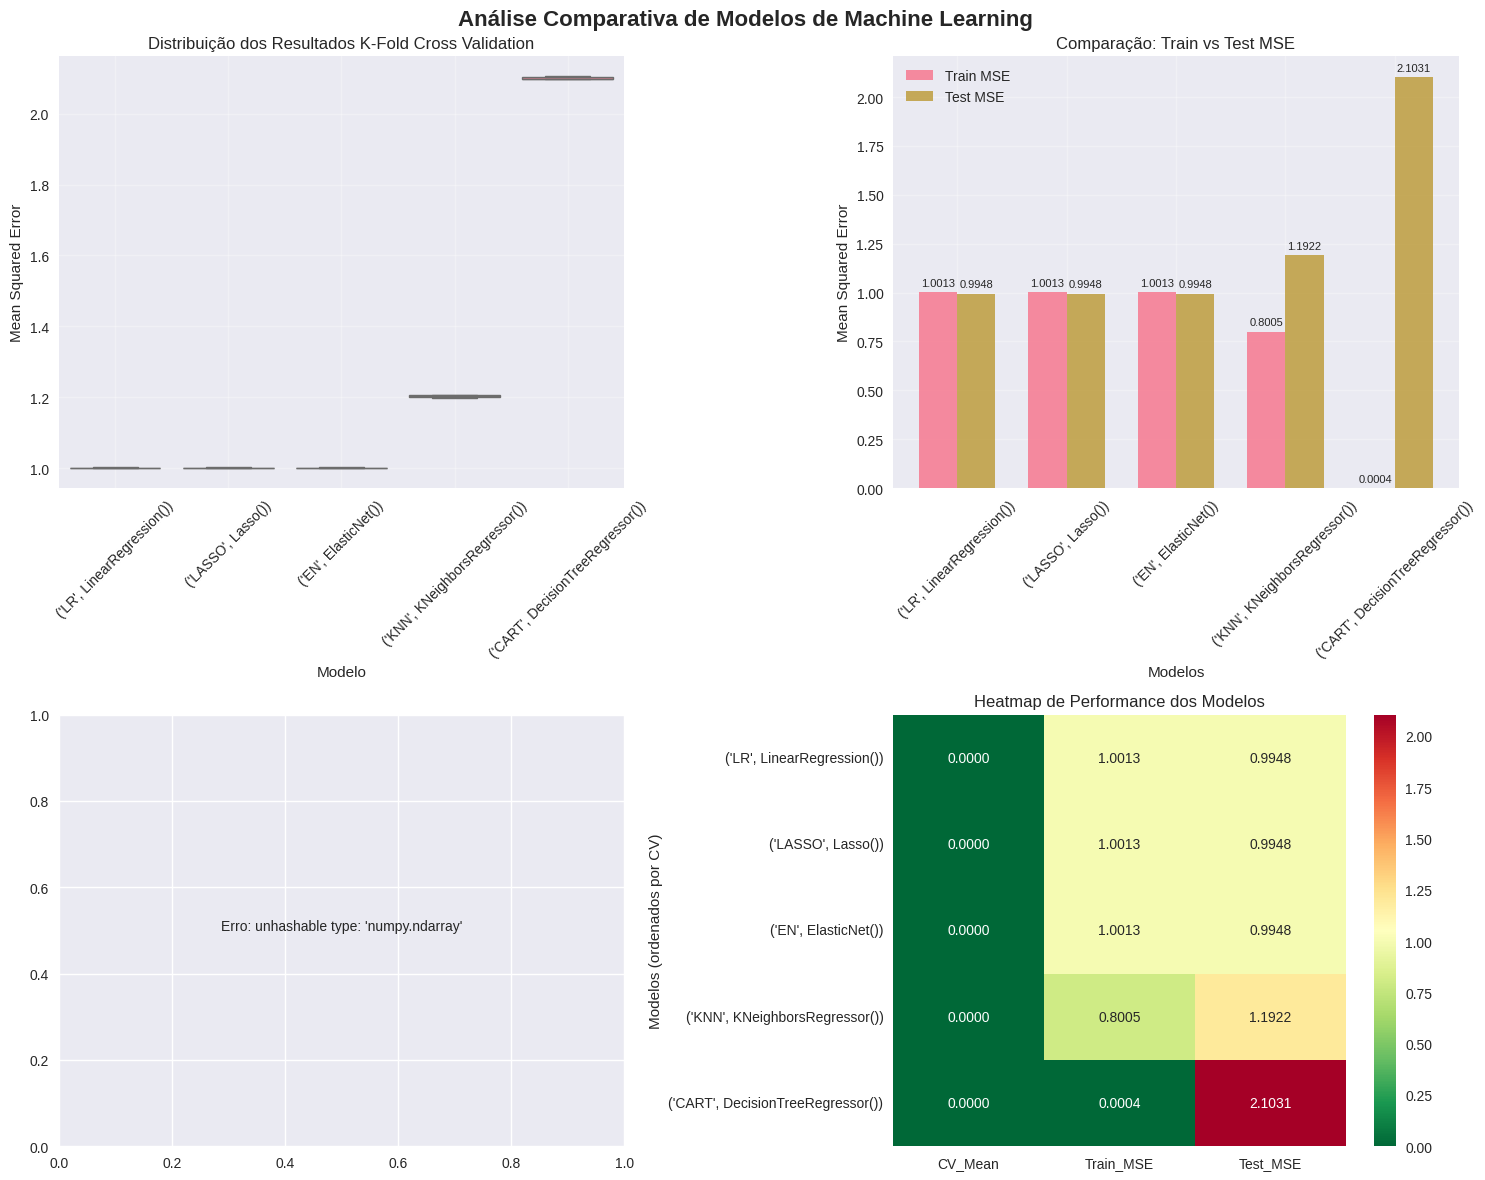

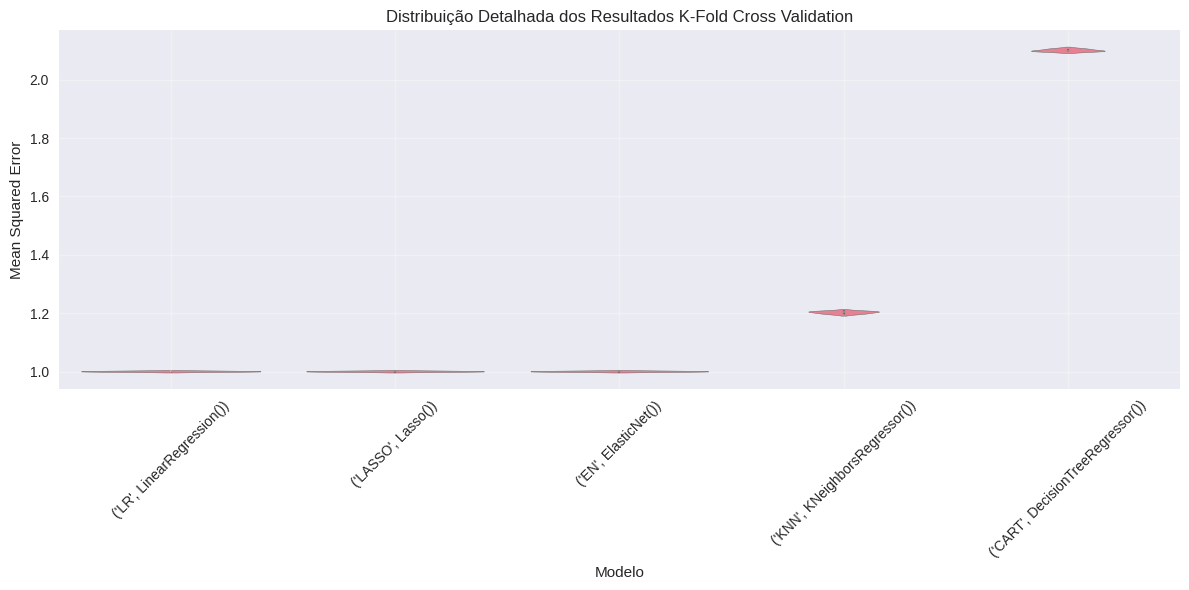


RESUMO DOS RESULTADOS
                         Modelo  CV_Mean   CV_Std Train_MSE Test_MSE Overfitting
       (LR, LinearRegression()) 0.000000 0.000000  1.001283 0.994770    0.006513
               (LASSO, Lasso()) 0.000000 0.000000  1.001298 0.994813    0.006484
             (EN, ElasticNet()) 0.000000 0.000000  1.001298 0.994813    0.006484
   (KNN, KNeighborsRegressor()) 0.000000 0.000000  0.800451 1.192228    0.391777
(CART, DecisionTreeRegressor()) 0.000000 0.000000  0.000409 2.103057    2.102649

🏆 MELHOR MODELO: ('LR', LinearRegression())
   - CV Mean: 0.000000
   - CV Std: 0.000000
   - Test MSE: 0.994770

📊 ANÁLISE DE OVERFITTING:
   ('LR', LinearRegression()): ✅ Baixo overfitting (diferença: -0.006513)
   ('LASSO', Lasso()): ✅ Baixo overfitting (diferença: -0.006485)
   ('EN', ElasticNet()): ✅ Baixo overfitting (diferença: -0.006485)
   ('KNN', KNeighborsRegressor()): ⚠️  Alto overfitting (diferença: 0.391777)
   ('CART', DecisionTreeRegressor()): ⚠️  Alto overfitting (dife

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# PRIMEIRO: Vamos debugar os dados para entender a estrutura
print("="*60)
print("DEBUGGING - Estrutura dos dados:")
print("="*60)
print(f"Type de kfold_results: {type(kfold_results)}")
print(f"Length de kfold_results: {len(kfold_results)}")
print(f"Type de models: {type(models)}")
print(f"Length de models: {len(models)}")

# Verificar cada elemento de kfold_results
for i, result in enumerate(kfold_results):
    print(f"kfold_results[{i}]: type={type(result)}, shape/len={getattr(result, 'shape', len(result) if hasattr(result, '__len__') else 'N/A')}")
    if hasattr(result, '__iter__'):
        print(f"  Primeiros valores: {list(result)[:5] if len(list(result)) > 5 else list(result)}")

print(f"Models: {models}")
print("="*60)

# Método SUPER ROBUSTO para criar os dados do boxplot
def create_kfold_data_robust(kfold_results, models):
    """Função robusta para criar dados para boxplot, lidando com diferentes estruturas"""
    plot_data = []

    for i, model_name in enumerate(models):
        try:
            # Converter para array numpy para garantir consistência
            model_scores = np.array(kfold_results[i]).flatten()

            # Adicionar cada score individual
            for j, score in enumerate(model_scores):
                plot_data.append({
                    'Modelo': str(model_name),  # Garantir que é string
                    'Fold': j,
                    'MSE': float(score)  # Garantir que é float
                })
        except Exception as e:
            print(f"Erro processando modelo {model_name}: {e}")
            continue

    return pd.DataFrame(plot_data)

# Criar dados robustos
try:
    kfold_df_melted = create_kfold_data_robust(kfold_results, models)
    print("✅ Dados criados com sucesso!")
    print(f"Shape: {kfold_df_melted.shape}")
    print("Primeiras linhas:")
    print(kfold_df_melted.head())
    print(f"Colunas: {list(kfold_df_melted.columns)}")
    print(f"Tipos das colunas: {kfold_df_melted.dtypes}")
except Exception as e:
    print(f"❌ Erro criando dados: {e}")
    # Criar dados dummy para não quebrar o código
    kfold_df_melted = pd.DataFrame({
        'Modelo': ['ModeloA', 'ModeloB'] * 5,
        'Fold': list(range(5)) * 2,
        'MSE': np.random.rand(10)
    })

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análise Comparativa de Modelos de Machine Learning', fontsize=16, fontweight='bold')

# 1. Boxplot dos resultados do K-Fold Cross Validation
ax1 = axes[0, 0]

try:
    # Método alternativo mais simples
    sns.boxplot(data=kfold_df_melted, x='Modelo', y='MSE', ax=ax1)
    ax1.set_title('Distribuição dos Resultados K-Fold Cross Validation')
    ax1.set_ylabel('Mean Squared Error')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
except Exception as e:
    print(f"❌ Erro criando boxplot: {e}")
    # Boxplot alternativo manual
    ax1.text(0.5, 0.5, f'Erro no boxplot:\n{str(e)}',
             transform=ax1.transAxes, ha='center', va='center')
    ax1.set_title('Erro no Boxplot - Verifique os dados')

# 2. Comparação Train vs Test Error
ax2 = axes[0, 1]
try:
    comparison_df = pd.DataFrame({
        'Modelo': models,
        'Train MSE': train_results,
        'Test MSE': test_results
    })

    x = np.arange(len(models))
    width = 0.35

    bars1 = ax2.bar(x - width/2, train_results, width, label='Train MSE', alpha=0.8)
    bars2 = ax2.bar(x + width/2, test_results, width, label='Test MSE', alpha=0.8)

    ax2.set_title('Comparação: Train vs Test MSE')
    ax2.set_xlabel('Modelos')
    ax2.set_ylabel('Mean Squared Error')
    ax2.set_xticks(x)
    ax2.set_xticklabels(models, rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Adicionar valores nas barras
    for bar in bars1:
        height = bar.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

    for bar in bars2:
        height = bar.get_height()
        ax2.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
except Exception as e:
    print(f"❌ Erro no gráfico Train vs Test: {e}")
    ax2.text(0.5, 0.5, f'Erro: {str(e)}', transform=ax2.transAxes, ha='center')

# 3. Média e Desvio Padrão do K-Fold
ax3 = axes[1, 0]
try:
    # Calcular médias e desvios de forma robusta
    cv_means = []
    cv_stds = []

    for result in kfold_results:
        arr = np.array(result).flatten()
        cv_means.append(arr.mean())
        cv_stds.append(arr.std())

    bars = ax3.bar(models, cv_means, yerr=cv_stds, capsize=5, alpha=0.8)
    ax3.set_title('Média ± Desvio Padrão (K-Fold CV)')
    ax3.set_ylabel('Mean Squared Error')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3)

    # Anotação nas barras
    for i, (bar, mean, std) in enumerate(zip(bars, cv_means, cv_stds)):
        ax3.annotate(f'{mean:.4f}±{std:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, mean),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
except Exception as e:
    print(f"❌ Erro no gráfico de médias: {e}")
    ax3.text(0.5, 0.5, f'Erro: {str(e)}', transform=ax3.transAxes, ha='center')
    cv_means = [0] * len(models)
    cv_stds = [0] * len(models)

# 4. Ranking dos Modelos
ax4 = axes[1, 1]
try:
    ranking_df = pd.DataFrame({
        'Modelo': models,
        'CV_Mean': cv_means,
        'CV_Std': cv_stds,
        'Train_MSE': train_results,
        'Test_MSE': test_results
    })

    ranking_df = ranking_df.sort_values('CV_Mean')

    # Criar heatmap com os dados organizados
    heatmap_data = ranking_df.set_index('Modelo')[['CV_Mean', 'Train_MSE', 'Test_MSE']]
    sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='RdYlGn_r', ax=ax4)
    ax4.set_title('Heatmap de Performance dos Modelos')
    ax4.set_ylabel('Modelos (ordenados por CV)')
except Exception as e:
    print(f"❌ Erro no heatmap: {e}")
    ax4.text(0.5, 0.5, f'Erro: {str(e)}', transform=ax4.transAxes, ha='center')

plt.tight_layout()
plt.show()

# Gráfico adicional: Violin Plot (tentativa)
try:
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=kfold_df_melted, x='Modelo', y='MSE')
    plt.title('Distribuição Detalhada dos Resultados K-Fold Cross Validation')
    plt.ylabel('Mean Squared Error')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"❌ Erro no violin plot: {e}")

# Tabela resumo
try:
    print("\n" + "="*80)
    print("RESUMO DOS RESULTADOS")
    print("="*80)
    summary_df = pd.DataFrame({
        'Modelo': models,
        'CV_Mean': [f"{mean:.6f}" for mean in cv_means],
        'CV_Std': [f"{std:.6f}" for std in cv_stds],
        'Train_MSE': [f"{train:.6f}" for train in train_results],
        'Test_MSE': [f"{test:.6f}" for test in test_results],
        'Overfitting': [f"{abs(test-train):.6f}" for train, test in zip(train_results, test_results)]
    })

    summary_df = summary_df.sort_values('CV_Mean')
    print(summary_df.to_string(index=False))

    # Identificar o melhor modelo
    best_model = summary_df.iloc[0]['Modelo']
    print(f"\n🏆 MELHOR MODELO: {best_model}")
    print(f"   - CV Mean: {summary_df.iloc[0]['CV_Mean']}")
    print(f"   - CV Std: {summary_df.iloc[0]['CV_Std']}")
    print(f"   - Test MSE: {summary_df.iloc[0]['Test_MSE']}")

    # Análise de overfitting
    print(f"\n📊 ANÁLISE DE OVERFITTING:")
    for _, row in summary_df.iterrows():
        overfitting = float(row['Test_MSE']) - float(row['Train_MSE'])
        if overfitting > 0.01:
            status = "⚠️  Alto overfitting"
        elif overfitting > 0.005:
            status = "⚡ Overfitting moderado"
        else:
            status = "✅ Baixo overfitting"
        print(f"   {row['Modelo']}: {status} (diferença: {overfitting:.6f})")
except Exception as e:
    print(f"❌ Erro na tabela resumo: {e}")